In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6523338651177492088
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 397390497491477547
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4869287936
locality {
  bus_id: 1
  links {
  }
}
incarnation: 1900817314732815840
physical_device_desc: "device: 0, name: GeForce GTX 1660, pci bus id: 0000:01:00.0, compute capability: 7.5"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 2860275469765542880
physical_device_desc: "device: XLA_GPU device"
]


In [2]:
import numpy as np
import pandas as pd
import random

from tqdm import tqdm

In [3]:
random.seed(42)

In [4]:
version='v1'

In [5]:
train = pd.read_excel('./data/rae_extra_all_v4_train.xlsx')
val = pd.read_excel('./data/rae_extra_all_v4_val.xlsx')
test = pd.read_excel('./data/rae_extra_all_v4_test.xlsx')

In [6]:
train

,Unnamed: 0,abstract,0,1,2,3
0,0,"본 연구는 청소년의 지역사회 및 가족, 학교생활과 관련한 사회자본의 중요성을 인식하...",5.194959,0.463620,3.099519,1.837639
1,1,최근 코로나19 사태로 인해 사람들 간의 물리적인 접촉을 최소화하려는 언택트 추세가...,2.523835,3.260611,1.669686,3.370940
2,2,글로벌경영이 보편화됨에 따라 이문화 조직(Cross-cultural Organiza...,0.930321,0.542420,1.852430,0.000000
3,3,본 연구는 청소년들이 학대경험에 대한 인식이 학업성취감에 미치는 영향과 스트레스를 ...,5.194959,0.463620,3.099519,1.837639
4,4,본 연구는 한국소비자들을 대상으로 중국 제품의 지각된 품질이 중국의 국가 및 제품 ...,4.333861,3.978497,3.662714,3.577977
...,...,...,...,...,...,...
2793,2793,"본 연구는 간호대학생의 임상실습 스트레스, 자아탄력성, 동료돌봄행위 정도를 파악하고...",4.946594,8.686300,1.476334,0.000000
2794,2794,본 연구에서는 청소년이 지각하는 부모의 방임 및 학대와 우울 간의 관계에서 자아존중...,7.886700,2.730818,1.936125,2.332378
2795,2795,경본 연구는 경찰청에서 조사한 2015~2016년도 경기남부지방경찰청 시흥경찰서의 ...,1.834378,1.115448,4.501013,3.099241
2796,2796,본 연구의 목적은 대학생의 자기불일치와 사후반추사고가 우울 및 사회불안에 미치는 상...,7.886700,2.730818,1.936125,2.332378


In [7]:
val

,Unnamed: 0,abstract,0,1,2,3
0,0,본 연구는 테블릿 pc 어플리케이션을 사용한 인지훈련이 인지 손상이 있는 아급성 뇌...,4.252167,2.948070,0.193734,2.841667
1,1,기독교대학은 대학생의 스트레스 상황에서 영향을 조절하여 완충시켜주거나 적응을 도와주...,4.448070,5.104998,1.674422,0.211541
2,2,"본 연구는 초등학생의 방과후 운동, 스마트폰 중독, 정신건강과의 관계를 탐색하기 위...",4.941952,1.189352,0.948080,5.824813
3,3,본 연구의 목적은 마을교육의 방과후학교 참여 의의를 살펴보고 학교와 마을교육 간의 ...,7.061509,4.723454,1.920044,4.697660
4,4,오늘날 고령화뿐만 아니라 복합적 욕구를 가진 인구의 증가는 사회적 돌봄의 필요성을 ...,2.356642,6.174630,5.023724,1.891224
...,...,...,...,...,...,...
927,927,본 연구는 직무스트레스 요인이 번영과 직무열의에 영향을 미치는 과정에 있어서 문화 ...,2.117849,2.717265,1.860312,0.000000
928,928,본 연구는 청소년의 ADHD 성향과 자기유능감 및 학교생활적응의 관계에서 실행기능 ...,4.311187,1.612342,2.545564,1.304350
929,929,"한국의 개인사업자수는 2017년 기준 560만명을 넘어섰는데, 그에 따라 경쟁이 치...",2.356642,6.174629,5.023723,1.891224
930,930,본 연구는 수원정신보건센터를 방문한 아동들을 대상으로 1) 스마트폰 중독에 따른 정...,3.285078,3.259609,2.390505,1.122444


In [8]:
test

,Unnamed: 0,abstract,0,1,2,3
0,0,"본 연구의 목적은 지금까지 개발된 초등학교 안전지도에 대한 비판적 차원의 분석, 검...",2.356642,6.174630,5.023724,1.891224
1,1,본 연구의 목적은 간호사의 여가활동 유형을 분류하고 실증적 분석을 실시하여 여가활동...,1.728056,2.490819,1.481277,0.309363
2,2,중국 소비자들의 한국화장품에 대한 소비행태에 대한 연구들은 꾸준하게 연구되어져 왔다...,0.569367,2.411349,0.669784,2.912357
3,3,본 연구의 목적은 북한이탈주민 부부의 부부관계 적응과 남한사회 적응 과정을 탐색하는...,1.272908,0.038271,3.581591,5.395686
4,4,"본 연구의 목적은 음악과 건강 체조 프로그램이 재가노인의 우울, 자아존중감 및 인지...",5.353525,2.865519,0.000000,1.439444
...,...,...,...,...,...,...
927,927,본 연구의 목적은 선행연구를 기초로 하여 호텔에 적합한 다차원적인 서비스 편의성을 ...,0.000000,1.773600,0.121333,4.443259
928,928,"최근 IT 기술의 발달과 함께 소셜 미디어, 모바일 단말기, 사물인터넷과 같은 다양...",0.000000,3.431511,3.441139,2.680054
929,929,"본 연구는 다차원적 진로정체감 모형을 사용하여 대학생의 진로정체감 지위(성취, 유실...",3.078681,0.956077,1.338593,0.836499
930,930,본 연구의 목적은 노인의 자살생각에 영향을 미치는 개인적 요인을 분석함으로써 노인자...,7.714356,5.515837,1.598979,2.919135


In [9]:
train_X = train['abstract']
train_X

0       본 연구는 청소년의 지역사회 및 가족, 학교생활과 관련한 사회자본의 중요성을 인식하...
1       최근 코로나19 사태로 인해 사람들 간의 물리적인 접촉을 최소화하려는 언택트 추세가...
2       글로벌경영이 보편화됨에 따라 이문화 조직(Cross-cultural Organiza...
3       본 연구는 청소년들이 학대경험에 대한 인식이 학업성취감에 미치는 영향과 스트레스를 ...
4       본 연구는 한국소비자들을 대상으로 중국 제품의 지각된 품질이 중국의 국가 및 제품 ...
                              ...                        
2793    본 연구는 간호대학생의 임상실습 스트레스, 자아탄력성, 동료돌봄행위 정도를 파악하고...
2794    본 연구에서는 청소년이 지각하는 부모의 방임 및 학대와 우울 간의 관계에서 자아존중...
2795    경본 연구는 경찰청에서 조사한 2015~2016년도 경기남부지방경찰청 시흥경찰서의 ...
2796    본 연구의 목적은 대학생의 자기불일치와 사후반추사고가 우울 및 사회불안에 미치는 상...
2797    본 연구에서는 수업요소와 창의성교육 요소를 통합적으로 고려한 유아교사의 창의성교육 ...
Name: abstract, Length: 2798, dtype: object

In [10]:
train_y = train.drop(['Unnamed: 0', 'abstract'], axis=1)
train_y

,0,1,2,3
0,5.194959,0.463620,3.099519,1.837639
1,2.523835,3.260611,1.669686,3.370940
2,0.930321,0.542420,1.852430,0.000000
3,5.194959,0.463620,3.099519,1.837639
4,4.333861,3.978497,3.662714,3.577977
...,...,...,...,...
2793,4.946594,8.686300,1.476334,0.000000
2794,7.886700,2.730818,1.936125,2.332378
2795,1.834378,1.115448,4.501013,3.099241
2796,7.886700,2.730818,1.936125,2.332378


In [11]:
val_X = val['abstract']
val_X

0      본 연구는 테블릿 pc 어플리케이션을 사용한 인지훈련이 인지 손상이 있는 아급성 뇌...
1      기독교대학은 대학생의 스트레스 상황에서 영향을 조절하여 완충시켜주거나 적응을 도와주...
2      본 연구는 초등학생의 방과후 운동, 스마트폰 중독, 정신건강과의 관계를 탐색하기 위...
3      본 연구의 목적은 마을교육의 방과후학교 참여 의의를 살펴보고 학교와 마을교육 간의 ...
4      오늘날 고령화뿐만 아니라 복합적 욕구를 가진 인구의 증가는 사회적 돌봄의 필요성을 ...
                             ...                        
927    본 연구는 직무스트레스 요인이 번영과 직무열의에 영향을 미치는 과정에 있어서 문화 ...
928    본 연구는 청소년의 ADHD 성향과 자기유능감 및 학교생활적응의 관계에서 실행기능 ...
929    한국의 개인사업자수는 2017년 기준 560만명을 넘어섰는데, 그에 따라 경쟁이 치...
930    본 연구는 수원정신보건센터를 방문한 아동들을 대상으로 1) 스마트폰 중독에 따른 정...
931    본 연구는 국내의 장애학생 고등교육과 관련된 연구논문들을 분석하여 전반적인 연구동향...
Name: abstract, Length: 932, dtype: object

In [12]:
val_y = val.drop(['Unnamed: 0', 'abstract'], axis=1)
val_y

,0,1,2,3
0,4.252167,2.948070,0.193734,2.841667
1,4.448070,5.104998,1.674422,0.211541
2,4.941952,1.189352,0.948080,5.824813
3,7.061509,4.723454,1.920044,4.697660
4,2.356642,6.174630,5.023724,1.891224
...,...,...,...,...
927,2.117849,2.717265,1.860312,0.000000
928,4.311187,1.612342,2.545564,1.304350
929,2.356642,6.174629,5.023723,1.891224
930,3.285078,3.259609,2.390505,1.122444


In [13]:
test_X = test['abstract']
test_X

0      본 연구의 목적은 지금까지 개발된 초등학교 안전지도에 대한 비판적 차원의 분석, 검...
1      본 연구의 목적은 간호사의 여가활동 유형을 분류하고 실증적 분석을 실시하여 여가활동...
2      중국 소비자들의 한국화장품에 대한 소비행태에 대한 연구들은 꾸준하게 연구되어져 왔다...
3      본 연구의 목적은 북한이탈주민 부부의 부부관계 적응과 남한사회 적응 과정을 탐색하는...
4      본 연구의 목적은 음악과 건강 체조 프로그램이 재가노인의 우울, 자아존중감 및 인지...
                             ...                        
927    본 연구의 목적은 선행연구를 기초로 하여 호텔에 적합한 다차원적인 서비스 편의성을 ...
928    최근 IT 기술의 발달과 함께 소셜 미디어, 모바일 단말기, 사물인터넷과 같은 다양...
929    본 연구는 다차원적 진로정체감 모형을 사용하여 대학생의 진로정체감 지위(성취, 유실...
930    본 연구의 목적은 노인의 자살생각에 영향을 미치는 개인적 요인을 분석함으로써 노인자...
931    2014년 한국 헌법재판소는 문화콘텐츠 산업 관련 중요한 판결을 내렸다. 여성가족부...
Name: abstract, Length: 932, dtype: object

In [14]:
test_y = test.drop(['Unnamed: 0', 'abstract'], axis=1)
test_y

,0,1,2,3
0,2.356642,6.174630,5.023724,1.891224
1,1.728056,2.490819,1.481277,0.309363
2,0.569367,2.411349,0.669784,2.912357
3,1.272908,0.038271,3.581591,5.395686
4,5.353525,2.865519,0.000000,1.439444
...,...,...,...,...
927,0.000000,1.773600,0.121333,4.443259
928,0.000000,3.431511,3.441139,2.680054
929,3.078681,0.956077,1.338593,0.836499
930,7.714356,5.515837,1.598979,2.919135


# 형태소 분석

In [15]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from nltk.tokenize import sent_tokenize

import re
from konlpy.tag import Okt

Using TensorFlow backend.


In [16]:
def text_preprocessing(text_list):
    
    hangul = re.compile('[^ ㄱ-ㅣ가-힣0-9]+')
    stopwords = ['을', '를', '이', '가', '은', '는', '의']
    tokenizer = Okt() #형태소 분석기 
    token_list = []
    
    for text in tqdm(text_list):
        txt = hangul.sub('', text)
        token = tokenizer.morphs(txt)
        token = [t for t in token if t not in stopwords or type(t) != float]
        token_list.append(token)
        
    return token_list

In [17]:
train_sent_token = text_preprocessing(train_X)
val_sent_token = text_preprocessing(val_X)
test_sent_token = text_preprocessing(test_X)

100%|████████████████████████████████████████████████████████████████████████████████| 932/932 [00:41<00:00, 22.69it/s]


In [18]:
val_sent_token[:4]

[['본',
  '연구는',
  '테블릿',
  '어플리케이션',
  '을',
  '사용',
  '한',
  '인지',
  '훈련이',
  '인지',
  '손상',
  '이',
  '있는',
  '아급성',
  '뇌졸중',
  '환자의',
  '인지',
  '기능',
  '일상생활',
  '및',
  '만족감에',
  '미치는',
  '영향을',
  '알고자',
  '하였다',
  '인천',
  '에',
  '소재한',
  '병원에',
  '입원',
  '중인',
  '14',
  '명의',
  '아급성',
  '뇌졸중',
  '환자',
  '들',
  '이',
  '본',
  '연구에',
  '참여',
  '하였다',
  '14',
  '명의',
  '대상자들은',
  '실험군',
  '과',
  '대조군',
  '으로',
  '7',
  '명씩',
  '무작위',
  '배정',
  '되었다',
  '두',
  '그룹의',
  '대상자들은',
  '모두',
  '전통적인',
  '인지',
  '치료를',
  '4',
  '주간',
  '주',
  '5회',
  '1일',
  '30분',
  '의',
  '중재를',
  '받았으며',
  '실험군',
  '은',
  '테블릿',
  '어플리케이션',
  '을',
  '사용',
  '한',
  '인지',
  '훈련을',
  '30분',
  '씩',
  '추가적으로',
  '실시',
  '하였다',
  '평가는',
  '중재',
  '전과',
  '후에',
  '한국판',
  '간이',
  '정신',
  '상태',
  '검사',
  '한국판',
  '몬트리올',
  '인지',
  '평가',
  '수정',
  '된',
  '바델',
  '지수',
  '시각',
  '상사',
  '척도를',
  '사용하여',
  '인지',
  '기능',
  '일상생활',
  '만족감을',
  '측정',
  '하였다',
  '연구',
  '결과',
  '두',
  '그룹은',
  '중재',
  '전과',
  '후로',
  '몬트리올',

# 문장과 단어 개수 확인

### train + val data

In [19]:
sent_token = list(train_X) + list(val_X)

In [20]:
word_len = []

for sentences in tqdm(sent_token):
    for sentence in sentences.split('. '):
        word_len.append(sentence.split(' '))

100%|████████████████████████████████████████████████████████████████████████████| 3730/3730 [00:01<00:00, 2921.86it/s]


In [21]:
word_len[1]

['이를',
 '위해',
 '한국청소년정책연구원에서',
 '구축한',
 '한국아동⋅',
 '청소년패널조사(Korean',
 'Children',
 '&',
 'Youth',
 'Panel',
 'Survey)의',
 '2013년~2016년(4차,',
 '5차,',
 '6차,',
 '7차)',
 '의',
 '데이터를',
 '사용하였다']

In [22]:
sentence_num = []

for sentences in tqdm(sent_token):
    sentence_num.append(sentences.split('. '))

100%|██████████████████████████████████████████████████████████████████████████| 3730/3730 [00:00<00:00, 340073.77it/s]


In [23]:
sentence_num[0]

['본 연구는 청소년의 지역사회 및 가족, 학교생활과 관련한 사회자본의 중요성을 인식하고, 청소년의 사회 자본이 주관적 삶의 만족도에 미치는 영향과 종단적 변화 양상을 잠재성장모델(Latent Growth Model)을 활용하여 분석하였다',
 '이를 위해 한국청소년정책연구원에서 구축한 한국아동⋅ 청소년패널조사(Korean Children & Youth Panel Survey)의 2013년~2016년(4차, 5차, 6차, 7차) 의 데이터를 사용하였다',
 '연구결과를 살펴보면 첫째, 청소년의 사회자본과 주관적 삶의 만족도의초기 값과의 관계는 학교 또래 관계(+), 부모와의 관계(+), 지역사회 인식(+), 교사와의 관계(+), 공동체 의식(+)이 정적인 관계가 있는 것으로 나타났다',
 '또한 청소년의 주관적 삶의 만족도에대한 시간에 따른 변화율은 성별(-), 학교 또래 관계(-), 학교 교사와의 관계(-), 공동체의식(-)이영향을 미침을 알 수 있다',
 '이에 청소년의 주관적 삶의 만족도에 가정 내 부모관계가 여전히 중요하지만 학교 사회자본과 지역사회 사회자본의 중요성 또한 주목하여 이를 강화시킬 수 있는 실천적대안을 제시하였다',
 '또한 고등학교로 진학하고 시간이 흐름에 따라 학교 또래 관계, 교사와의 관계, 공동체 의식 변수가 스트레스에 대한 보호적 역할을 지속할 수 있도록 학교 현장에 맞는 정책적대안이 필요함을 제언하는 바이다',
 '본 연구는 청소년의 주관적 삶의 만족도와 사회자본과의 관계와종단적 영향을 보여줌으로서 청소년의 주관적 삶의 만족도 향상을 위한 학문적 기초를 제공함에그 의의가 있을 것이다']

In [24]:
print('문서 내의 최대 문장 개수: ', max([len(i) for i in sentence_num]))
print('문서 내의 최소 문장 개수: ', min([len(i) for i in sentence_num]))
print('문서 내의 평균 문장 개수 :', sum(map(len, sentence_num))/len(sentence_num))
print('문서 내의 문장 개수 중앙값 :', np.median([len(i) for i in sentence_num]))

문서 내의 최대 문장 개수:  35
문서 내의 최소 문장 개수:  5
문서 내의 평균 문장 개수 : 7.892493297587132
문서 내의 문장 개수 중앙값 : 7.0


In [25]:
print('문장 내의 최대 단어 개수: ', max([len(j) for j in word_len]))
print('문장 내의 최소 단어 개수: ', min([len(j) for j in word_len]))
print('문장 내의 평균 단어 개수 :', sum(map(len, word_len))/len(word_len))
print('문장 내의 단어 개수 중앙값 :', np.median([len(j) for j in word_len]))

문장 내의 최대 단어 개수:  509
문장 내의 최소 단어 개수:  1
문장 내의 평균 단어 개수 : 18.38516933319746
문장 내의 단어 개수 중앙값 : 17.0


In [26]:
MAX_SENTENCES = 20
MAX_SENTENCE_LENGTH = 200

# 데이터셋 구성

In [27]:
train_val_sent_token = train_sent_token + val_sent_token

In [28]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_val_sent_token)


max_nb_words = len(tokenizer.word_index) + 1

def doc2hierarchical(text, max_sentences = MAX_SENTENCES, max_sentence_length = MAX_SENTENCE_LENGTH):
    sentences = text.split('. ')
    tokenized_sentences = tokenizer.texts_to_sequences(sentences)
    tokenized_sentences = pad_sequences(tokenized_sentences, maxlen = max_sentence_length)

    pad_size = max_sentences - tokenized_sentences.shape[0]

    if pad_size <= 0:  # tokenized_sentences.shape[0] < max_sentences
        tokenized_sentences = tokenized_sentences[:max_sentences]
    else:
        tokenized_sentences = np.pad(tokenized_sentences, ((0, pad_size), (0, 0)), mode='constant', constant_values=0)
    
    return tokenized_sentences
            
def build_dataset(x_data, y_data, max_sentences = MAX_SENTENCES, max_sentence_length = MAX_SENTENCE_LENGTH, tokenizer = tokenizer):
    nb_instances = len(x_data)
    X_data = np.zeros((nb_instances, max_sentences, max_sentence_length), dtype='int32')
    for i, review in enumerate(x_data):
        tokenized_sentences = doc2hierarchical(review)
            
        X_data[i] = tokenized_sentences[None, ...]
        
    nb_classes = y_data
    #print(nb_classes)
    Y_data = nb_classes #to_categorical(y_data, nb_classes)
    
    return X_data, Y_data


train_X_data, train_Y_data = build_dataset(train_X, train_y)
val_X_data, val_Y_data = build_dataset(val_X, val_y)
test_X_data, test_Y_data = build_dataset(test_X, test_y)

print("train_X_data.shape: {}".format(train_X_data.shape))
print("train_Y_data.shape: {}".format(train_Y_data.shape))
print("val_X_data.shape: {}".format(val_X_data.shape))
print("val_Y_data.shape: {}".format(val_Y_data.shape))
print("test_X_data.shape: {}".format(test_X_data.shape))
print("test_Y_data.shape: {}".format(test_Y_data.shape))

train_X_data.shape: (2798, 20, 200)
train_Y_data.shape: (2798, 4)
val_X_data.shape: (932, 20, 200)
val_Y_data.shape: (932, 4)
test_X_data.shape: (932, 20, 200)
test_Y_data.shape: (932, 4)


In [29]:
tokenizer.word_index

{'의': 1,
 '하였다': 2,
 '에': 3,
 '을': 4,
 '이': 5,
 '과': 6,
 '본': 7,
 '영향을': 8,
 '대한': 9,
 '것으로': 10,
 '적': 11,
 '및': 12,
 '수': 13,
 '를': 14,
 '미치는': 15,
 '는': 16,
 '나타났다': 17,
 '은': 18,
 '한': 19,
 '있는': 20,
 '하고': 21,
 '있다': 22,
 '하는': 23,
 '인': 24,
 '연구는': 25,
 '분석': 26,
 '연구': 27,
 '가': 28,
 '와': 29,
 '할': 30,
 '위해': 31,
 '으로': 32,
 '통해': 33,
 '결과': 34,
 '되었다': 35,
 '로': 36,
 '것이': 37,
 '대상으로': 38,
 '위한': 39,
 '연구의': 40,
 '한다': 41,
 '고': 42,
 '다': 43,
 '이를': 44,
 '직무': 45,
 '에서': 46,
 '우울': 47,
 '된': 48,
 '한국': 49,
 '실시': 50,
 '들': 51,
 '하기': 52,
 '진로': 53,
 '이러한': 54,
 '유의한': 55,
 '그': 56,
 '확인': 57,
 '자기': 58,
 '사회적': 59,
 '또한': 60,
 '검증': 61,
 '둘째': 62,
 '첫째': 63,
 '사회': 64,
 '하여': 65,
 '중': 66,
 '그리고': 67,
 '교육': 68,
 '관련': 69,
 '중국': 70,
 '있었다': 71,
 '사용': 72,
 '따라': 73,
 '지': 74,
 '이다': 75,
 '학교': 76,
 '긍정적': 77,
 '성': 78,
 '활용': 79,
 '삶의': 80,
 '서비스': 81,
 '조직': 82,
 '하였으며': 83,
 '다음': 84,
 '제시': 85,
 '셋째': 86,
 '명을': 87,
 '높은': 88,
 '영향': 89,
 '학습': 90,
 '도': 91,
 '청소년의': 92,
 '

In [30]:
word_index = tokenizer.word_index
print('Total %s unique tokens.' % len(word_index))

Total 43358 unique tokens.


## Embedding model

In [31]:
from gensim.models import Word2Vec
from keras.layers import Embedding

In [32]:
model = Word2Vec.load('./data/embedding/word2vec_okt_all_random_262.model')

In [33]:
word_vectors = model.wv
word_vectors

In [34]:
embed_size = 100

In [35]:
def get_vector(word):
    if word in word_vectors:
        return word_vectors[word]
    else:
        return None

In [36]:
embedding_matrix = np.zeros((len(word_index) + 1, embed_size))
absent_words = 0
for word, i in word_index.items():
    tmp = get_vector(word)
    if tmp is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = tmp
    else:
        absent_words += 1
print('Total absent words are', absent_words, 'which is', "%0.2f" % (absent_words * 100 / len(word_index)), '% of total words')

Total absent words are 7 which is 0.02 % of total words


# Hierarchical Attention Network

In [37]:
import keras
import tensorflow as tf
from keras import backend as K
from keras.engine.topology import Layer
from keras import initializers as initializers, regularizers, constraints

from keras.models import Model, Sequential
from keras.layers import Input, Dense
from keras.layers import Bidirectional, TimeDistributed, LSTM, Conv1D, MaxPooling1D
from keras.layers import BatchNormalization, Dropout
from keras.layers import Lambda, Permute, RepeatVector, Multiply
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [38]:
class AttentionWithContext(Layer):
    """
    Attention operation, with a context/query vector, for temporal data.
    Supports Masking.
    Follows the work of Yang et al. [https://www.cs.cmu.edu/~diyiy/docs/naacl16.pdf]
    "Hierarchical Attention Networks for Document Classification"
    by using a context vector to assist the attention
    # Input shape
        3D tensor with shape: `(samples, steps, features)`.
    # Output shape
        2D tensor with shape: `(samples, features)`.
    How to use:
    Just put it on top of an RNN Layer (GRU/LSTM/SimpleRNN) with return_sequences=True.
    The dimensions are inferred based on the output shape of the RNN.
    Note: The layer has been tested with Keras 2.0.6
    Example:
        model.add(LSTM(64, return_sequences=True))
        model.add(AttentionWithContext())
        # next add a Dense layer (for classification/regression) or whatever...
    """

    def __init__(self,
                 W_regularizer=None, u_regularizer=None, b_regularizer=None,
                 W_constraint=None, u_constraint=None, b_constraint=None,
                 bias=True, **kwargs):

        self.supports_masking = True
        self.init = initializers.get('glorot_uniform')

        self.W_regularizer = regularizers.get(W_regularizer)
        self.u_regularizer = regularizers.get(u_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)

        self.W_constraint = constraints.get(W_constraint)
        self.u_constraint = constraints.get(u_constraint)
        self.b_constraint = constraints.get(b_constraint)

        self.bias = bias
        super(AttentionWithContext, self).__init__(**kwargs)

    def get_config(self):

        config = super().get_config().copy()
        config.update({
            'W_regularizer': self.W_regularizer,
            'u_regularizer': self.u_regularizer,
            'b_regularizer': self.b_regularizer,
            'W_constraint': self.W_constraint,
            'u_constraint': self.u_constraint,
            'b_constraint': self.b_constraint,
            'bias': self.bias
        })
        return config

    def build(self, input_shape):
        assert len(input_shape) == 3

        self.W = self.add_weight(shape=(input_shape[-1], input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_W'.format(self.name),
                                 regularizer=self.W_regularizer,
                                 constraint=self.W_constraint)
        if self.bias:
            self.b = self.add_weight(shape=(input_shape[-1],),
                                     initializer='zero',
                                     name='{}_b'.format(self.name),
                                     regularizer=self.b_regularizer,
                                     constraint=self.b_constraint)

        self.u = self.add_weight(shape=(input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_u'.format(self.name),
                                 regularizer=self.u_regularizer,
                                 constraint=self.u_constraint)

        super(AttentionWithContext, self).build(input_shape)

    def compute_mask(self, input, input_mask=None):
        # do not pass the mask to the next layers
        return None

    def call(self, x, mask=None):
        uit = dot_product(x, self.W)

        if self.bias:
            uit += self.b

        uit = K.tanh(uit)
        ait = dot_product(uit, self.u)

        a = K.exp(ait)

        # apply mask after the exp. will be re-normalized next
        if mask is not None:
            # Cast the mask to floatX to avoid float64 upcasting in theano
            a *= K.cast(mask, K.floatx())

        # in some cases especially in the early stages of training the sum may be almost zero
        # and this results in NaN's. A workaround is to add a very small positive number ε to the sum.
        # a /= K.cast(K.sum(a, axis=1, keepdims=True), K.floatx())
        a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())

        a = K.expand_dims(a)
        weighted_input = x * a
        return K.sum(weighted_input, axis=1)

    def compute_output_shape(self, input_shape):
        return input_shape[0], input_shape[-1]

In [39]:
def dot_product(x, kernel):
    """
    Wrapper for dot product operation, in order to be compatibl|e with both
    Theano and Tensorflow
    Args:
        x (): input
        kernel (): weights
    Returns:
    """
    if K.backend() == 'tensorflow':
        return K.squeeze(K.dot(x, K.expand_dims(kernel)), axis=-1)
    else:
        return K.dot(x, kernel)

In [40]:
EMBEDDING_DIM = 100

REG_PARAM = 1e-13
l2_reg = regularizers.l2(REG_PARAM)

In [41]:
embedding_layer = Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            weights = [embedding_matrix],
                            input_length = MAX_SENTENCE_LENGTH,
                            trainable = False)

In [42]:
import time

In [43]:
start = time.time()

with tf.device('/gpu:0'):
    # first, build a sentence encoder
    word_input = Input(shape=(MAX_SENTENCE_LENGTH,), dtype='float32')
    word_sequences = embedding_layer(word_input)
    word_lstm = Bidirectional(LSTM(100, return_sequences=True, kernel_regularizer=l2_reg))(word_sequences)
    word_dense = TimeDistributed(Dense(200, kernel_regularizer=l2_reg))(word_lstm)
    word_att = AttentionWithContext()(word_dense)
    wordEncoder = Model(word_input, word_att)

    # then, build a document encoder
    sent_input = Input(shape=(MAX_SENTENCES, MAX_SENTENCE_LENGTH), dtype='float32')
    sent_encoder = TimeDistributed(wordEncoder)(sent_input)
    sent_lstm = Bidirectional(LSTM(100, return_sequences=True, kernel_regularizer=l2_reg))(sent_encoder)
    sent_dense = TimeDistributed(Dense(200, kernel_regularizer=l2_reg))(sent_lstm)
    sent_att = AttentionWithContext()(sent_dense)

    # finally, add fc layers for classification
    hidden = BatchNormalization()(sent_att)
    hidden = Dense(100, activation='relu')(hidden)
    hidden = Dropout(0.2)(hidden)
    hidden = Dense(50, activation='relu')(hidden)
    preds = Dense(4)(hidden)
    
    model = Model(inputs=[sent_input], outputs=[preds])

    
    optimizer = keras.optimizers.Adam(lr=0.001)
    model.compile(loss=['mse'], optimizer=optimizer)


    es = EarlyStopping(monitor='val_loss', patience=5)
    model_path = './save_models/han_rae_extra_all_{}'.format(version) + '_{epoch:02d}_{val_loss:.5f}.h5'
    mc = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, mode='auto')

       
    history = model.fit(x=[train_X_data], y=[train_Y_data], batch_size=32, epochs=30,
                        verbose=True, validation_data=(val_X_data, val_Y_data), callbacks=[es, mc])
    
print("time :", time.time() - start)

Train on 2798 samples, validate on 932 samples
Epoch 1/30
2798/2798 [==============================] - 80s 29ms/step - loss: 4.9673 - val_loss: 5.3480

Epoch 00001: saving model to ./save_models/han_rae_extra_all_v1_01_5.34797.h5
Epoch 2/30
2798/2798 [==============================] - 79s 28ms/step - loss: 3.4298 - val_loss: 4.6042

Epoch 00002: saving model to ./save_models/han_rae_extra_all_v1_02_4.60421.h5
Epoch 3/30
2798/2798 [==============================] - 78s 28ms/step - loss: 3.0920 - val_loss: 3.9109

Epoch 00003: saving model to ./save_models/han_rae_extra_all_v1_03_3.91093.h5
Epoch 4/30
2798/2798 [==============================] - 79s 28ms/step - loss: 2.9110 - val_loss: 3.2438

Epoch 00004: saving model to ./save_models/han_rae_extra_all_v1_04_3.24383.h5
Epoch 5/30
2798/2798 [==============================] - 78s 28ms/step - loss: 2.5630 - val_loss: 3.0563

Epoch 00005: saving model to ./save_models/han_rae_extra_all_v1_05_3.05628.h5
Epoch 6/30
2798/2798 [================

In [44]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 20, 200)           0         
_________________________________________________________________
time_distributed_2 (TimeDist (None, 20, 200)           4577300   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 20, 200)           240800    
_________________________________________________________________
time_distributed_3 (TimeDist (None, 20, 200)           40200     
_________________________________________________________________
attention_with_context_2 (At (None, 200)               40400     
_________________________________________________________________
batch_normalization_1 (Batch (None, 200)               800       
_________________________________________________________________
dense_3 (Dense)              (None, 100)               2010

In [45]:
import matplotlib.pyplot as plt

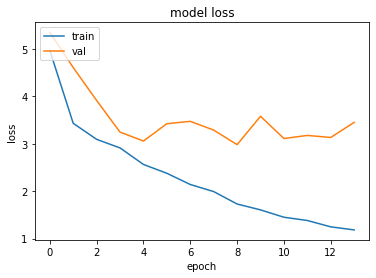

<Figure size 432x288 with 0 Axes>

In [46]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.savefig('./img/HAN_RAE_extra_all_{}.png'.format(version))

# Inference

In [37]:
import keras
import tensorflow as tf
from keras import backend as K
from keras.engine.topology import Layer
from keras import initializers as initializers, regularizers, constraints

from keras.models import Model, Sequential
from keras.layers import Input, Dense
from keras.layers import Bidirectional, TimeDistributed, LSTM, Conv1D, MaxPooling1D
from keras.layers import BatchNormalization, Dropout
from keras.layers import Lambda, Permute, RepeatVector, Multiply
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [38]:
class AttentionWithContext(Layer):
    """
    Attention operation, with a context/query vector, for temporal data.
    Supports Masking.
    Follows the work of Yang et al. [https://www.cs.cmu.edu/~diyiy/docs/naacl16.pdf]
    "Hierarchical Attention Networks for Document Classification"
    by using a context vector to assist the attention
    # Input shape
        3D tensor with shape: `(samples, steps, features)`.
    # Output shape
        2D tensor with shape: `(samples, features)`.
    How to use:
    Just put it on top of an RNN Layer (GRU/LSTM/SimpleRNN) with return_sequences=True.
    The dimensions are inferred based on the output shape of the RNN.
    Note: The layer has been tested with Keras 2.0.6
    Example:
        model.add(LSTM(64, return_sequences=True))
        model.add(AttentionWithContext())
        # next add a Dense layer (for classification/regression) or whatever...
    """

    def __init__(self,
                 W_regularizer=None, u_regularizer=None, b_regularizer=None,
                 W_constraint=None, u_constraint=None, b_constraint=None,
                 bias=True, **kwargs):

        self.supports_masking = True
        self.init = initializers.get('glorot_uniform')

        self.W_regularizer = regularizers.get(W_regularizer)
        self.u_regularizer = regularizers.get(u_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)

        self.W_constraint = constraints.get(W_constraint)
        self.u_constraint = constraints.get(u_constraint)
        self.b_constraint = constraints.get(b_constraint)

        self.bias = bias
        super(AttentionWithContext, self).__init__(**kwargs)

    def get_config(self):

        config = super().get_config().copy()
        config.update({
            'W_regularizer': self.W_regularizer,
            'u_regularizer': self.u_regularizer,
            'b_regularizer': self.b_regularizer,
            'W_constraint': self.W_constraint,
            'u_constraint': self.u_constraint,
            'b_constraint': self.b_constraint,
            'bias': self.bias
        })
        return config

    def build(self, input_shape):
        assert len(input_shape) == 3

        self.W = self.add_weight(shape=(input_shape[-1], input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_W'.format(self.name),
                                 regularizer=self.W_regularizer,
                                 constraint=self.W_constraint)
        if self.bias:
            self.b = self.add_weight(shape=(input_shape[-1],),
                                     initializer='zero',
                                     name='{}_b'.format(self.name),
                                     regularizer=self.b_regularizer,
                                     constraint=self.b_constraint)

        self.u = self.add_weight(shape=(input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_u'.format(self.name),
                                 regularizer=self.u_regularizer,
                                 constraint=self.u_constraint)

        super(AttentionWithContext, self).build(input_shape)

    def compute_mask(self, input, input_mask=None):
        # do not pass the mask to the next layers
        return None

    def call(self, x, mask=None):
        uit = dot_product(x, self.W)

        if self.bias:
            uit += self.b

        uit = K.tanh(uit)
        ait = dot_product(uit, self.u)

        a = K.exp(ait)

        # apply mask after the exp. will be re-normalized next
        if mask is not None:
            # Cast the mask to floatX to avoid float64 upcasting in theano
            a *= K.cast(mask, K.floatx())

        # in some cases especially in the early stages of training the sum may be almost zero
        # and this results in NaN's. A workaround is to add a very small positive number ε to the sum.
        # a /= K.cast(K.sum(a, axis=1, keepdims=True), K.floatx())
        a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())

        a = K.expand_dims(a)
        weighted_input = x * a
        return K.sum(weighted_input, axis=1)

    def compute_output_shape(self, input_shape):
        return input_shape[0], input_shape[-1]

In [39]:
def dot_product(x, kernel):
    """
    Wrapper for dot product operation, in order to be compatibl|e with both
    Theano and Tensorflow
    Args:
        x (): input
        kernel (): weights
    Returns:
    """
    if K.backend() == 'tensorflow':
        return K.squeeze(K.dot(x, K.expand_dims(kernel)), axis=-1)
    else:
        return K.dot(x, kernel)

In [40]:
from keras.utils import CustomObjectScope
from keras.models import load_model

## HAN load

In [41]:
with CustomObjectScope({'AttentionWithContext': AttentionWithContext}):
    model = load_model('./save_models/best_models/han_rae_extra_all_v1_05_3.05628.h5')

In [42]:
model.evaluate(test_X_data, test_Y_data, batch_size=32)

932/932 [==============================] - 4s 4ms/step


3.258111416526107

In [43]:
pred = model.predict(test_X_data, batch_size=32)
pred

array([[1.7816027, 2.5492995, 1.5522138, 2.6010995],
       [3.0968177, 2.1838427, 0.7466641, 1.3214926],
       [1.1799656, 2.9124303, 0.6083981, 4.650003 ],
       ...,
       [2.253261 , 2.011768 , 0.9982283, 2.7100635],
       [6.65671  , 3.041023 , 1.0515697, 2.0739481],
       [1.7747947, 1.1410756, 1.5019931, 2.6474884]], dtype=float32)

## Decoder load

In [44]:
decoder = load_model('./save_models/decoder_models/residual_decoder_extra_all_v4.h5')

C:\Users\user\.conda\envs\mlc2\lib\site-packages\keras\engine\saving.py:384: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [45]:
test_decode = decoder.predict(pred)
test_decode

array([[6.51071605e-05, 8.91991484e-04, 1.10260182e-04, ...,
        6.01605780e-06, 6.08901064e-05, 3.22918058e-05],
       [3.36943355e-11, 2.77524872e-04, 2.15635650e-04, ...,
        5.68612677e-08, 4.98048787e-04, 1.25992738e-04],
       [4.39740215e-12, 2.07408375e-05, 4.22686851e-03, ...,
        4.36060219e-08, 6.78132679e-08, 2.54913088e-04],
       ...,
       [1.24244925e-08, 1.18170900e-03, 2.89910249e-02, ...,
        5.67765710e-06, 1.05130137e-03, 6.15958264e-03],
       [1.96158564e-20, 1.31077177e-05, 9.78866865e-07, ...,
        3.13731788e-14, 1.25928636e-05, 4.64348477e-06],
       [2.14344453e-09, 6.65471365e-04, 4.18450101e-04, ...,
        5.94127050e-04, 1.43436645e-03, 4.09681769e-03]], dtype=float32)

In [46]:
import matplotlib.pyplot as plt

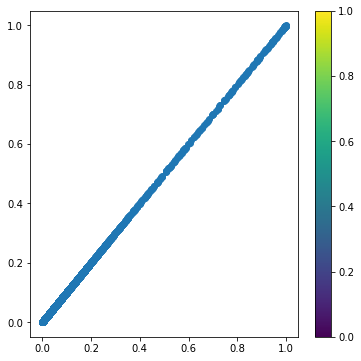

In [47]:
plt.figure(figsize=(6, 6))
plt.scatter(test_decode[:, :], test_decode[:, :])
plt.colorbar()
plt.show()

In [48]:
"""test_predict = test_decode.round()
test_predict"""

'test_predict = test_decode.round()\ntest_predict'

In [49]:
test_predict = np.where(test_decode > 0.5, 1, 0)
test_predict

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [50]:
#c_matrix = multilabel_confusion_matrix(one_hot_test_labels, predicted_label)

In [51]:
#c_matrix.shape

In [52]:
#c_matrix

## Test label load

In [53]:
test_X = pd.read_excel('./data/all_10_random_12000_262_test.xlsx')
test_X = test_X.drop(['Unnamed: 0', 'abstract'], axis=1)
test_X

,4차산업혁명,가족건강성,간호,간호대학생,간호사,감정,감정노동,개인정보,개인정보보호,개인정보보호법,...,한류,한반도,한중,해외직접투자,핵심역량,행복감,현상학,확인적요인분석,회복탄력성,희망
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
928,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
929,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
930,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
one_hot_test_labels = np.array(test_X)
print(one_hot_test_labels)
print(one_hot_test_labels.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(932, 262)


In [55]:
from sklearn.metrics import multilabel_confusion_matrix, f1_score, recall_score, precision_score, accuracy_score, hamming_loss

In [56]:
print('accuracy : ', accuracy_score(one_hot_test_labels, test_predict))
print('precision : ', precision_score(one_hot_test_labels, test_predict, average='micro'))
print('recall : ', recall_score(one_hot_test_labels, test_predict, average='micro'))
print('f1 : ', f1_score(one_hot_test_labels, test_predict, average='micro'))
print('------------------------')
print('hamming_loss : ', hamming_loss(one_hot_test_labels, test_predict))

accuracy :  0.019313304721030045
precision :  0.41317365269461076
recall :  0.05211480362537765
f1 :  0.09255533199195172
------------------------
hamming_loss :  0.005540903580906202


In [57]:
print('accuracy : ', accuracy_score(one_hot_test_labels, test_predict))
print('precision : ', precision_score(one_hot_test_labels, test_predict, average='samples'))
print('recall : ', recall_score(one_hot_test_labels, test_predict, average='samples'))
print('f1 : ', f1_score(one_hot_test_labels, test_predict, average='samples'))
print('------------------------')
print('hamming_loss : ', hamming_loss(one_hot_test_labels, test_predict))

accuracy :  0.019313304721030045
precision :  0.0609799713876967
recall :  0.04729971387696709
f1 :  0.049535050071530765
------------------------
hamming_loss :  0.005540903580906202


C:\Users\user\.conda\envs\mlc2\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Visualization

In [68]:
# wrong example
attention_extractor = Model(inputs=[document_input],
                            outputs=[word_attention, sentence_attention])
attention_extractor.predict(X_test[:10])

NameError: name 'document_input' is not defined

In [ ]:
word_attention_extractor = Model(inputs=[sentence_input],
                                 outputs=[word_attention])

word_attentions = TimeDistributed(word_attention_extractor)(document_input)

attention_extractor = Model(inputs=[document_input],
                            outputs=[word_attentions, sentence_attention])
attention_extractor.predict(X_test[:10])

In [ ]:
word_rev_index = {}
for word, i in tokenizer.word_index.items():
    word_rev_index[i] = word

def sentiment_analysis(review):    
    sentences = sent_tokenize(review)
    tokenized_sentences = tokenizer.texts_to_sequences(sentences)
    tokenized_sentences = pad_sequences(tokenized_sentences, maxlen=MAX_SENTENCE_LENGTH)
    pad_size = MAX_SENTENCES - tokenized_sentences.shape[0]

    if pad_size <= 0:
        tokenized_sentences = tokenized_sentences[:MAX_SENTENCES]
    else:
        tokenized_sentences = np.pad(
            tokenized_sentences, ((0, pad_size), (0, 0)),
            mode='constant', constant_values=0
        )
    
    # word attention만 가져오기
    pred_attention = attention_extractor.predict(np.asarray([tokenized_sentences]))[0]
    for i, sentence in enumerate(tokenized_sentences[:-pad_size]):
        words = [word_rev_index[word_id] for word_id in sentence if word_id != 0][:50]
        pred_att = np.asarray(pred_attention[0][i][::-1][:len(words)][::-1])
        pred_att = np.expand_dims(pred_att, axis=0)

        fig, ax = plt.subplots(figsize=(len(words), 2))
        plt.rc('xtick', labelsize=22)
        heatmap = sn.heatmap(pred_att, xticklabels=words, square=True, linewidths=0.1)
        plt.xticks(rotation=70)
        plt.show()
        
sentiment_analysis("Delicious healthy food. The steak is amazing. Fish and pork are awesome too. Service is above and beyond. Not a bad thing to say about this place. Worth every penny!")